<a href="https://colab.research.google.com/github/amthreeh/BDA_-/blob/main/%EB%A6%AC%ED%8F%AC%ED%8A%B8/WEEK1_%ED%95%84%EC%88%98_%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#교차 검증(Cross Validation)

Train set과 test set으로 분리해서 데이터를 훈련시킵니다.
분리하는 이유는 train set이 많이 학습되서 좋은 결과를 나타내지만 테스트셋에서는 과적합되어 실제 데이터를 가져와 예측을 수행하면  overfitting의 위험성이 있습니다.

	overfitting: 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 할 경우에 예측 성능이 떨어지는 것을 의미함.

                         
교차 검증은 이러한 데이터 편증을 막기 위해 여러 세트로 구성된 학습 데이터셋과 테스트셋에서 학습과 평가를 수행합니다. 그리고 각 세트에서 수행한 평가 결과에 따라 하이퍼파라미터 튜닝 등의 모델 최적화를 쉽게 할 수 있습니다.






##교차 검증의 장점:
  정확도 향상, 데이터 부족으로 인한 underfitting 방지
  평가에 사용되는 데이터 편중을 막을 수 있습니다.

교차 검증이란, 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것입니다.


### K-Fold Cross Validation(k-겹 교차 검증)
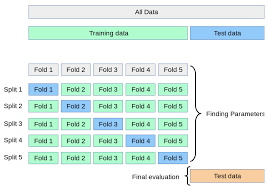                    
- 회귀 모델에 사용됨.
- 가장 대표적인 방법
- 원리: training set과 test set으로 나눔.
- Training set을 k개의 폴드로 나누어 사용함.
- Test set을 제외한 학습데이터를 몇등분(k-fold) 할 것인지 결정
- K등분한 학습데이터와 validation데이터를 번갈아가며 바꿔서 진행
- Cross_val_score을 통해 교차 검증이 잘 진행되었는지 확인가능함.

####Train_test_split
overfitting을 막기 위함


#### 교차 검증이 잘 되었는지 확인하기(점수계산방법)
cross_val_score (*scoring parameter*)

##교차 검증 방법
1. K-fold
2. Stratified K Fold: target 속성의 개수를 일정하게 가져감. 데이터가 한곳으로 몰리는 것을 방지함.
3. 반복되는 k-fold: RepeatedKFold
4. Leave One Out (LOO) : 하나를 제외한 모든 샘플을 생성하는 방식
5. Leave P Out(LPO): P=2이면 2개를 아웃시킴
6. Shuffle & split으로 랜덤 교차검증하기


#K-Fold 사용법

In [1]:
#iris 데이터 불러오기기
from sklearn.datasets import load_iris

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

## iris 데이터 둘러보기

In [2]:
iris = load_iris()
iris_data = iris.data #각 키에 저장된 value 확인
iris_data.shape

(150, 4)

In [3]:
iris.feature_names  #feature 확인

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris_label = iris.target
iris_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['y'] = iris.target

In [7]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#홀드아웃 교차검증: train_test_split

- train: 모델을 학습시키기 위한 dataset
- validataion: 이미 학습이 완료된 모델을 검증하기 위한 dataset.        
    모델을 업데이트할 때 사용될 뿐, 학습을 시키지 않지만 학습에 '관여'함
- test: 학습과 검증이 완료된 모델의 성능을 평가하기 위한 dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.3, random_state=11111)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


150개의 데이터를 7:3 비율로 trainset과 testset으로 분리함.

In [12]:
from sklearn.metrics import accuracy_score

df_clf = DecisionTreeClassifier(random_state=111)
df_clf.fit(X_train, y_train)

pred = df_clf.predict(X_test)
print('정확도: {0:.3f}'.format(accuracy_score(y_test, pred)))

정확도: 0.978


#kfold 교차검증

In [29]:
from sklearn.model_selection import KFold
SPLITS = 5
kf = KFold(n_splits = SPLITS)
n_iter = 0

In [30]:
from sklearn.tree import DecisionTreeClassifier
score_list = []

for train_idx, test_idx in kf.split(iris_data):
  n_iter+=1
  X_train, X_test = iris_data[train_idx], iris_data[test_idx]
  y_train, y_test = iris_label[train_idx], iris_label[test_idx]

  df_clf = DecisionTreeClassifier(random_state=111)
  df_clf.fit(X_train, y_train)
  preds = df_clf.predict(X_test)
  score = accuracy_score(y_test, preds)

  print(f'{n_iter}번째 acuuracy score: {score}')
  score_list.append(score)

1번째 acuuracy score: 1.0
2번째 acuuracy score: 0.9666666666666667
3번째 acuuracy score: 0.8666666666666667
4번째 acuuracy score: 0.9333333333333333
5번째 acuuracy score: 0.7333333333333333


#Stratified K-Fold 교차검증

In [25]:
from sklearn.model_selection import StratifiedKFold

SPLITS = 5
skf = StratifiedKFold(n_splits=SPLITS)
n_iter=0

In [28]:
from sklearn.tree import DecisionTreeClassifier
score_list = []

#stratifiedKFold의 split()호출시 반드시 레이블 데이터 셋도 추가 입력 필요요
for train_idx, test_idx in skf.split(iris_data, iris_label):
  n_iter+=1
  X_train, X_test = iris_data[train_idx], iris_data[test_idx]
  y_train, y_test = iris_label[train_idx], iris_label[test_idx]

  df_clf = DecisionTreeClassifier(random_state=111)
  df_clf.fit(X_train, y_train)
  preds = df_clf.predict(X_test)
  score = accuracy_score(y_test, preds)

  print(f'{n_iter}번째 acuuracy score: {score}')
  score_list.append(score)

1번째 acuuracy score: 0.9666666666666667
2번째 acuuracy score: 0.9666666666666667
3번째 acuuracy score: 0.9
4번째 acuuracy score: 0.9666666666666667
5번째 acuuracy score: 1.0


데이터 특성상 label의 비율을 반영한 stratifiedKfold가 더 정확도가 높았음을 알 수 있습니다.